##  Chargement des bibliothèques et des données


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score


df = pd.read_csv("maintenance_data.csv") 

## Visualisation rapide


In [10]:
display(df.columns)

Index(['Identifiant Panne', 'Type Machine', 'Durée Panne (h)',
       'Coût Réparation (€)', 'Température Avant Panne (°C)',
       'Vibration Anormale', 'Fréquence Pannes', 'Catégorie Problème',
       'Temps Dernière Maintenance (j)', 'Niveau Usure (%)'],
      dtype='object')

In [11]:
display(df.head())

,Identifiant Panne,Type Machine,Durée Panne (h),Coût Réparation (€),Température Avant Panne (°C),Vibration Anormale,Fréquence Pannes,Catégorie Problème,Temps Dernière Maintenance (j),Niveau Usure (%)
0,4994e737,Pompe,10.89,13360.59,34.1,Oui,19,Logiciel,348,9.8
1,0b701221,Compresseur,6.28,1394.80,43.4,Oui,16,Électrique,86,28.5
2,55080cf9,Turbine,35.60,23308.58,97.7,Non,13,Logiciel,337,92.8
3,a0559b0d,Moteur,2.79,5233.72,41.6,Non,5,Hydraulique,46,44.8
4,2eaea197,Compresseur,7.02,1800.09,39.5,Non,10,Mécanique,84,35.1


In [12]:
display(df.describe())

,Durée Panne (h),Coût Réparation (€),Température Avant Panne (°C),Fréquence Pannes,Temps Dernière Maintenance (j),Niveau Usure (%)
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,17.62790,11216.660200,78.322000,10.380000,183.630000,52.898000
std,17.56164,11068.687859,27.961195,5.925088,112.189563,28.357722
min,1.60000,540.840000,30.100000,1.000000,10.000000,1.300000
25%,5.00000,4175.020000,51.175000,5.000000,88.500000,32.325000
50%,11.19000,8124.910000,84.600000,12.000000,164.000000,53.900000
75%,21.33750,12181.852500,103.575000,15.000000,299.000000,79.350000
max,71.62000,46078.970000,119.300000,20.000000,365.000000,100.000000


On peut deja identifier, qu'en moyenne, une panne fait perdre 17h, avec 183j entre chaque maintenance.Mais surtout on peut voir qu'on atteint généralement une température d'environ 80° avant une panne.Dépendant du contexte industrielle,on pourrait dejà mettre des gardes fous autour de ce paramètre.

In [13]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Identifiant Panne               100 non-null    object 
 1   Type Machine                    100 non-null    object 
 2   Durée Panne (h)                 100 non-null    float64
 3   Coût Réparation (€)             100 non-null    float64
 4   Température Avant Panne (°C)    100 non-null    float64
 5   Vibration Anormale              100 non-null    object 
 6   Fréquence Pannes                100 non-null    int64  
 7   Catégorie Problème              100 non-null    object 
 8   Temps Dernière Maintenance (j)  100 non-null    int64  
 9   Niveau Usure (%)                100 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 7.9+ KB


None

## Nettoyage des données


In [ ]:
print(df.columns)  


Index(['Identifiant Panne', 'Type Machine', 'Durée Panne (h)',
       'Coût Réparation (€)', 'Température Avant Panne (°C)',
       'Vibration Anormale', 'Fréquence Pannes', 'Catégorie Problème',
       'Temps Dernière Maintenance (j)', 'Niveau Usure (%)'],
      dtype='object')


In [15]:
data = df.drop(columns=['Identifiant Panne'])

On peut retirer la colonne "Identifiant Panne" car l'on a pas beson d'elle pour faire nos prédictions.

In [8]:
print(data.columns) 

Index(['Type Machine', 'Durée Panne (h)', 'Coût Réparation (€)',
       'Température Avant Panne (°C)', 'Vibration Anormale',
       'Fréquence Pannes', 'Catégorie Problème',
       'Temps Dernière Maintenance (j)', 'Niveau Usure (%)'],
      dtype='object')


In [17]:
# Encodage des variables qualitatives (sauf la variable cible)
categorical_cols = ['Type Machine', 'Vibration Anormale']
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # One-Hot Encoding


one_hot_encoded = one_hot_encoder.fit_transform(data[categorical_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Remplacement des colonnes qualitatives par leur encodage
data = data.drop(columns=categorical_cols).reset_index(drop=True)
data = pd.concat([data, one_hot_df], axis=1)

# Encodage de la variable cible (si classification)
label_encoder = LabelEncoder()
data['Catégorie Problème'] = label_encoder.fit_transform(data['Catégorie Problème'])

# Suppression des valeurs manquantes
data.dropna(inplace=True)

# Séparation des variables explicatives et de la cible
X = data.drop(columns=['Catégorie Problème'])  # Features
y = data['Catégorie Problème']  # Cible

# Normalisation des variables numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Ici, on garde les valeurs qualitatives, et on les attrribue un label.Par exemple, "Type Machine" pourrait correspondre à 1.Cela nous permt de pouvoir utiliser ces variables dans les prédictions futures.

In [21]:
one_hot_mapping = {i: col for i, col in enumerate(one_hot_encoder.get_feature_names_out(categorical_cols))}
print("Mapping des variables One-Hot Encodées :")
print(one_hot_mapping)




Mapping des variables One-Hot Encodées :
{0: 'Type Machine_Générateur', 1: 'Type Machine_Moteur', 2: 'Type Machine_Pompe', 3: 'Type Machine_Turbine', 4: 'Vibration Anormale_Oui'}


In [18]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping de 'Catégorie Problème' :")
print(label_mapping)


Mapping de 'Catégorie Problème' :
{'Hydraulique': 0, 'Logiciel': 1, 'Mécanique': 2, 'Électrique': 3}


# Séparation des données

In [ ]:
#y = data['Catégorie Problème'].round().astype(int)  # Arrondit et convertit en entier

In [23]:
# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Avec prise en compte du coût

## Classification supervisée : KNN pour prédire de la panne

In [32]:
from sklearn.metrics import accuracy_score

for k in range(1, 21):  # Tester des k impairs
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"K={k}, Accuracy: {accuracy_score(y_test, y_pred):.2f}")


K=1, Accuracy: 0.30
K=2, Accuracy: 0.20
K=3, Accuracy: 0.20
K=4, Accuracy: 0.20
K=5, Accuracy: 0.25
K=6, Accuracy: 0.35
K=7, Accuracy: 0.25
K=8, Accuracy: 0.30
K=9, Accuracy: 0.25
K=10, Accuracy: 0.25
K=11, Accuracy: 0.20
K=12, Accuracy: 0.25
K=13, Accuracy: 0.30
K=14, Accuracy: 0.30
K=15, Accuracy: 0.25
K=16, Accuracy: 0.25
K=17, Accuracy: 0.30
K=18, Accuracy: 0.30
K=19, Accuracy: 0.25
K=20, Accuracy: 0.30


In [33]:
print(y_train.value_counts())


Catégorie Problème
0    26
2    20
3    18
1    16
Name: count, dtype: int64


📌 KNN Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.60      0.38         5
           1       0.33      0.50      0.40         2
           2       0.50      0.33      0.40         6
           3       0.50      0.14      0.22         7

    accuracy                           0.35        20
   macro avg       0.40      0.39      0.35        20
weighted avg       0.43      0.35      0.33        20

📌 KNN Confusion Matrix:
 [[3 1 1 0]
 [0 1 0 1]
 [4 0 2 0]
 [4 1 1 1]]


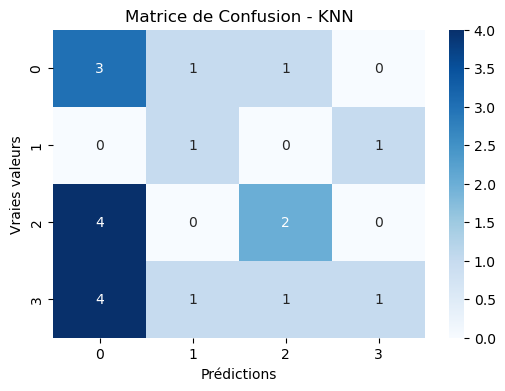

In [26]:
# Modèle KNN
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Évaluation du modèle KNN
print("📌 KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("📌 KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Affichage de la matrice de confusion pour KNN
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion - KNN")
plt.show()

Les résultats sont nuls et ne permettent pas une utilisation fiable.

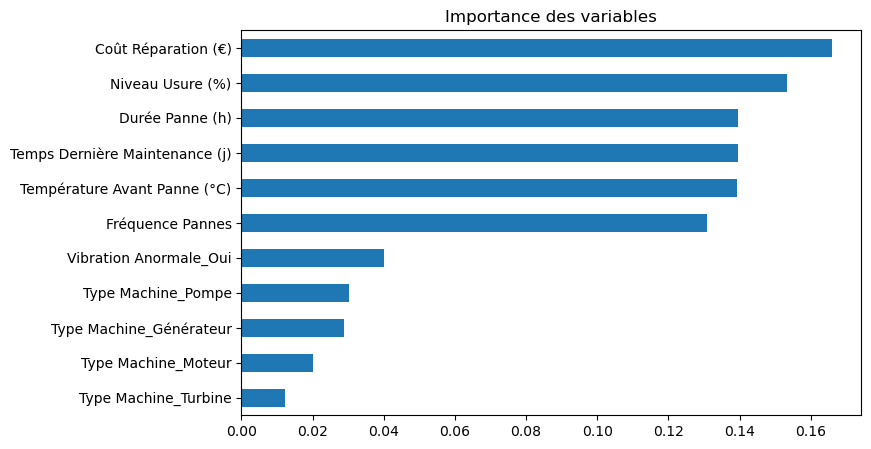

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Modèle Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Importance des features
X_train_df = pd.DataFrame(X_train, columns=X.columns)
importances = pd.Series(rf.feature_importances_, index=X_train_df.columns)

# Affichage des importances des variables
importances.sort_values().plot(kind='barh', figsize=(8,5), title="Importance des variables")
plt.show()


On peut voir que le coût de la réparation joue un rôle très important dans le jeu de données.On peut commencer à envisager de retirer la variable.

## PCA avec coût

📊 Variance expliquée par PC1: 24.43%
📊 Variance expliquée par PC2: 13.58%


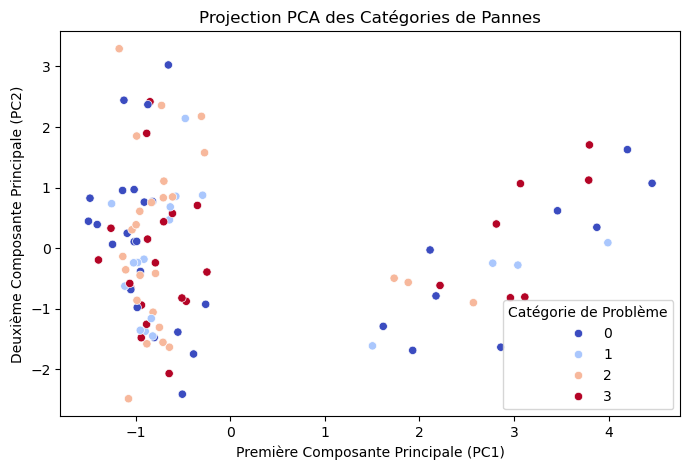

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Application du PCA
pca = PCA(n_components=2)  # Réduction à 2 dimensions pour la visualisation
X_pca = pca.fit_transform(X_scaled)

# Création d'un DataFrame pour la visualisation
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Catégorie Problème'] = y  # Associer la catégorie des pannes

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
print(f"📊 Variance expliquée par PC1: {explained_variance[0]*100:.2f}%")
print(f"📊 Variance expliquée par PC2: {explained_variance[1]*100:.2f}%")

# Visualisation en 2D avec la catégorie des pannes
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Catégorie Problème'], palette='coolwarm')
plt.xlabel("Première Composante Principale (PC1)")
plt.ylabel("Deuxième Composante Principale (PC2)")
plt.title("Projection PCA des Catégories de Pannes")
plt.legend(title="Catégorie de Problème")
plt.show()


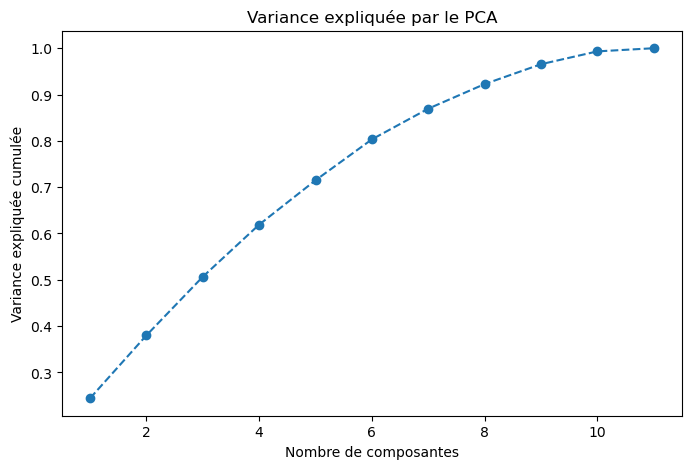

In [35]:
pca_full = PCA()
pca_full.fit(X_scaled)

# Graphique de la variance expliquée
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), 
         np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée par le PCA')
plt.show()

In [ ]:
components = pd.DataFrame(pca.components_, columns=X.columns, index=[f"PC{i}" for i in range(1, pca.n_components_+1)])
print(components.loc[['PC1', 'PC2']])



     Durée Panne (h)  Coût Réparation (€)  Température Avant Panne (°C)  \
PC1         0.553114             0.506527                      0.107740   
PC2         0.093832             0.032585                     -0.398162   

     Fréquence Pannes  Temps Dernière Maintenance (j)  Niveau Usure (%)  \
PC1          0.036315                        0.133851          0.027225   
PC2         -0.134568                        0.488922         -0.084340   

     Type Machine_Générateur  Type Machine_Moteur  Type Machine_Pompe  \
PC1                -0.172648            -0.137156           -0.103159   
PC2                -0.161502             0.522579           -0.285809   

     Type Machine_Turbine  Vibration Anormale_Oui  
PC1              0.583189               -0.080876  
PC2             -0.059792                0.427669  


En visualisant le PCA, et à quel point le coût de la réparation explique jusqu'à 50% de la variance, je prends l'initiative de retirer cette colonne du jeu de données.

# Sans prise en compte du coût de réparation

📊 Variance expliquée par PC1: 21.15%
📊 Variance expliquée par PC2: 14.92%


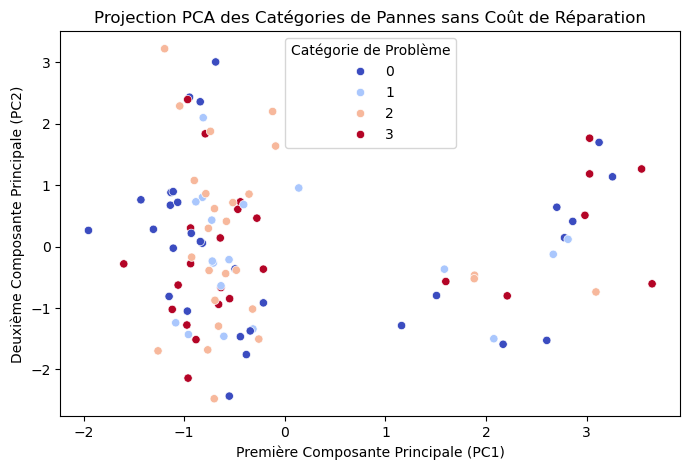

In [38]:
# Suppression de la colonne 'Coût Réparation (€)'
X_without_cost = X.drop(columns=['Coût Réparation (€)'])

# Normalisation des données
scaler = StandardScaler()
X_scaled_without_cost = scaler.fit_transform(X_without_cost)

# Application du PCA
pca_without_cost = PCA(n_components=2)
X_pca_without_cost = pca_without_cost.fit_transform(X_scaled_without_cost)

# Création d'un DataFrame pour la visualisation
df_pca_without_cost = pd.DataFrame(X_pca_without_cost, columns=['PC1', 'PC2'])
df_pca_without_cost['Catégorie Problème'] = y  # Associer la catégorie des pannes

# Variance expliquée par chaque composante
explained_variance_without_cost = pca_without_cost.explained_variance_ratio_
print(f"📊 Variance expliquée par PC1: {explained_variance_without_cost[0]*100:.2f}%")
print(f"📊 Variance expliquée par PC2: {explained_variance_without_cost[1]*100:.2f}%")

# Visualisation en 2D avec la catégorie des pannes
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca_without_cost['PC1'], y=df_pca_without_cost['PC2'], hue=df_pca_without_cost['Catégorie Problème'], palette='coolwarm')
plt.xlabel("Première Composante Principale (PC1)")
plt.ylabel("Deuxième Composante Principale (PC2)")
plt.title("Projection PCA des Catégories de Pannes sans Coût de Réparation")
plt.legend(title="Catégorie de Problème")
plt.show()


In [41]:
# Affichage des charges de PCA pour chaque composante
loadings = pd.DataFrame(pca_without_cost.components_.T, columns=['PC1', 'PC2'], index=X_without_cost.columns)

# Affichage des charges pour PC1 et PC2
print(loadings)


                                     PC1       PC2
Durée Panne (h)                 0.626098  0.123391
Température Avant Panne (°C)    0.149648 -0.382520
Fréquence Pannes                0.101040 -0.115216
Temps Dernière Maintenance (j)  0.157079  0.499737
Niveau Usure (%)                0.059553 -0.066432
Type Machine_Générateur        -0.233021 -0.184511
Type Machine_Moteur            -0.167543  0.522052
Type Machine_Pompe             -0.134896 -0.292497
Type Machine_Turbine            0.654495 -0.031974
Vibration Anormale_Oui         -0.135084  0.421743


### Interprétion des PCA


#### PC1 (Première Composante Principale) (Explication générée par IA)

Durée Panne (h) : 0.626098 — Cela montre que Durée Panne (h) est fortement influente sur PC1, ce qui signifie que PC1 représente probablement une mesure globale de la durée des pannes.

Température Avant Panne (°C) : 0.149648 — Cette variable a aussi une contribution positive, mais moins marquée que la durée de panne.

Type Machine_Turbine : 0.654495 — Les machines de type Turbine ont une forte influence sur PC1, ce qui pourrait indiquer que PC1 est lié aux pannes sur les turbines.

Type Machine_Générateur : -0.233021 et Type Machine_Moteur : -0.167543 — Cela suggère que les pannes sur les générateurs et moteurs ont une relation inverse avec PC1 (moins de contribution par rapport aux turbines).

Vibration Anormale_Oui : -0.135084 — Les vibrations anormales contribuent également, mais de manière plus faible, à PC1.

Dans l'ensemble, PC1 semble représenter des facteurs associés à la durée de la panne, le type de machine et possiblement l'impact sur la turbine.

#### PC2 (Deuxième Composante Principale) (Explication générée par IA)

Temps Dernière Maintenance (j) : 0.499737 — Le temps de dernière maintenance est un facteur majeur de PC2, ce qui peut signifier que PC2 est lié à des éléments de maintenance ou des problèmes qui se manifestent après un certain temps de non-maintenance.

Type Machine_Moteur : 0.522052 — Les moteurs jouent également un rôle important dans PC2, suggérant qu'une panne de moteur pourrait être un facteur clé de cette composante.

Température Avant Panne (°C) : -0.382520 — Température a une contribution négative à PC2, ce qui pourrait signifier que des températures plus basses avant une panne sont associées à cette composante.

Vibration Anormale_Oui : 0.421743 — La présence de vibrations anormales a une forte contribution à PC2, ce qui pourrait indiquer qu'une vibration anormale précède certains types de pannes.

Type Machine_Pompe : -0.292497 et Type Machine_Turbine : -0.031974 — Les pompes et turbines ont une contribution négative à PC2, ce qui montre qu'elles sont moins associées à cette composante par rapport aux moteurs ou à la maintenance.

En résumé, PC2 semble être davantage influencée par des facteurs liés à la maintenance (temps de dernière maintenance), les moteurs, et des problèmes mécaniques tels que les vibrations anormales.

### Conclusion PCA


On peut en conclure que les problèmes liés aux turbines (type 3) causent des temps morts (dû au temps de la panne) beaucoup plus long que les autres types de pannes.
On peut aussi normalement en déduire, que les moteurs (type 1) provoquent plus de panne s'il y a présence de vibrations anormales,ou bien des temps trop long entre les maintenances.

## Régression linéaire afin de savoir si l'on peut prédire les coûts de réparations

📊 Mean Absolute Error: 3282.65
📊 Mean Squared Error: 21057154.61
📊 Root Mean Squared Error: 4588.81


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


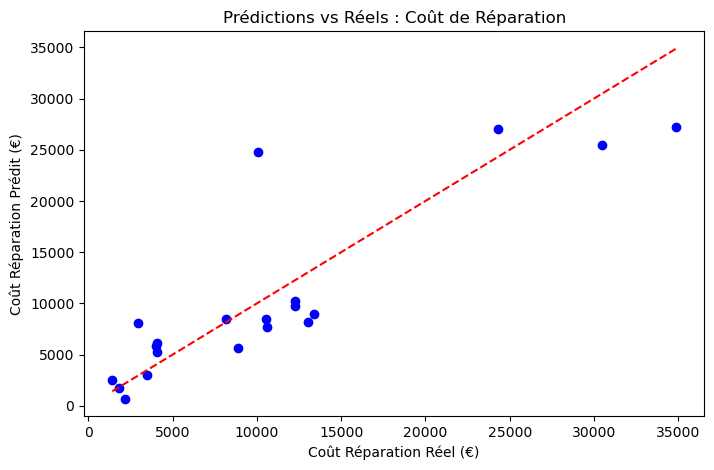

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Séparation des données en variables explicatives (X) et cible (y)
y_cost = data['Coût Réparation (€)']  # Cible : coût de réparation
X_without_target = X.drop(columns=['Coût Réparation (€)'])  # Variables explicatives

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_without_target, y_cost, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle de régression linéaire
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Prédiction
y_pred = regressor.predict(X_test_scaled)

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"📊 Mean Absolute Error: {mae:.2f}")
print(f"📊 Mean Squared Error: {mse:.2f}")
print(f"📊 Root Mean Squared Error: {rmse:.2f}")

# Affichage des prédictions vs réelles
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Coût Réparation Réel (€)')
plt.ylabel('Coût Réparation Prédit (€)')
plt.title("Prédictions vs Réels : Coût de Réparation")
plt.show()


# Impact de la température

## Clustering non supervisé : Segmentation avec KMeans

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

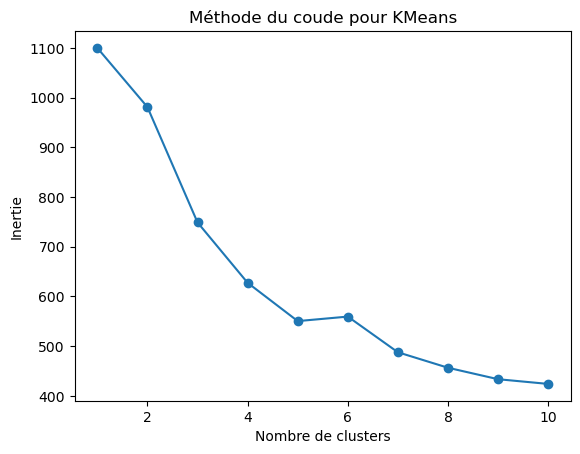

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcule l'inertie pour différentes valeurs de k
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Affiche la courbe de l'Elbow
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour KMeans')
plt.show()


In [48]:
print(data.columns)  

Index(['Durée Panne (h)', 'Coût Réparation (€)',
       'Température Avant Panne (°C)', 'Fréquence Pannes',
       'Catégorie Problème', 'Temps Dernière Maintenance (j)',
       'Niveau Usure (%)', 'Type Machine_Générateur', 'Type Machine_Moteur',
       'Type Machine_Pompe', 'Type Machine_Turbine', 'Vibration Anormale_Oui'],
      dtype='object')


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


📊 KMeans Silhouette Score: 0.242


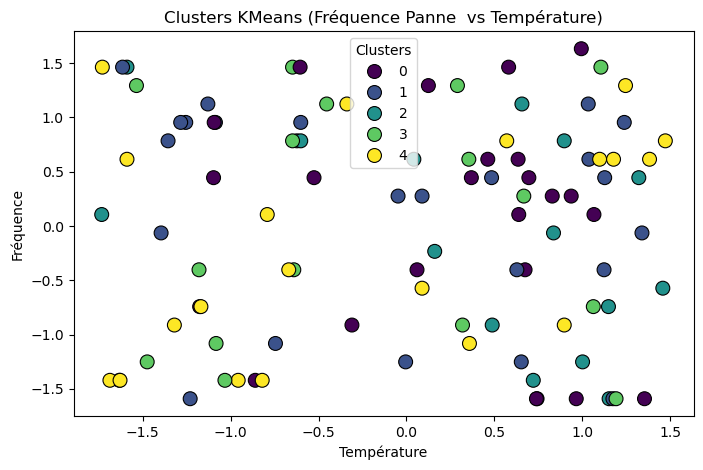

In [80]:
X_clustering = data[['Durée Panne (h)', 'Coût Réparation (€)', 
                     'Température Avant Panne (°C)', 'Fréquence Pannes', 
                     'Temps Dernière Maintenance (j)', 'Niveau Usure (%)','Type Machine_Générateur', 'Type Machine_Moteur',
       'Type Machine_Pompe', 'Type Machine_Turbine', 'Vibration Anormale_Oui']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Application de KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=100)
data['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Score de silhouette pour évaluer la qualité du clustering
silhouette_kmeans = silhouette_score(X_scaled, data['Cluster_KMeans'])
print(f"📊 KMeans Silhouette Score: {silhouette_kmeans:.3f}")

# Visualisation des clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_scaled[:, 2], y=X_scaled[:, 3], hue=data['Cluster_KMeans'], palette='viridis', s=100, edgecolor='k')
plt.title('Clusters KMeans (Fréquence Panne  vs Température)')
plt.xlabel('Température')
plt.ylabel('Fréquence')
plt.legend(title='Clusters')
plt.show()

Après plusieurs test, j'ai toujours des mauvais score de silhouettes en preant en compte la normalisation.


## Kmeans sans normalisation

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


📊 KMeans Silhouette Score (sans normalisation): 0.646


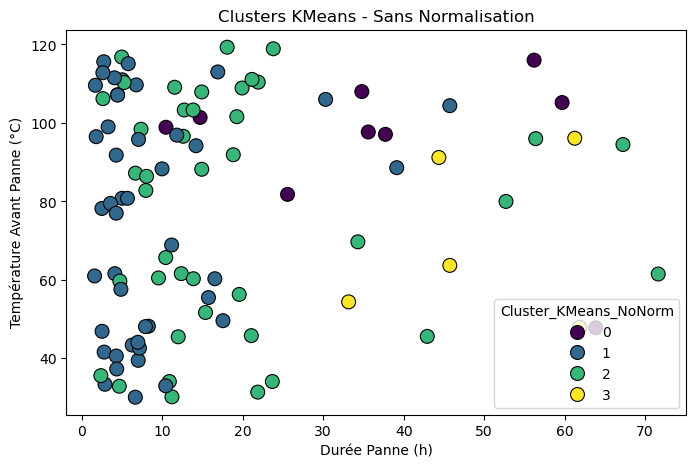

In [86]:
# Appliquer KMeans sans normalisation
kmeans_no_norm = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Cluster_KMeans_NoNorm'] = kmeans_no_norm.fit_predict(X)

# Score de silhouette sans normalisation
silhouette_kmeans_no_norm = silhouette_score(X, data['Cluster_KMeans_NoNorm'])
print(f"📊 KMeans Silhouette Score (sans normalisation): {silhouette_kmeans_no_norm:.3f}")

# Visualisation des clusters sans normalisation
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Durée Panne (h)'], y=data['Température Avant Panne (°C)'], hue=data['Cluster_KMeans_NoNorm'], palette='viridis', s=100, edgecolor='k')
plt.title('Clusters KMeans - Sans Normalisation')
plt.show()


On peut voir qu'il y a plus de pannes lorsque l'on dépasse 80°.Pour vce qui est de la catégorie,cela nécessiyte plus de travail.

## Clustering avec DBSCAN 

In [15]:
print(data.columns)

Index(['Note Globale', 'Nombre de Mots', 'Mots-Clés Positifs',
       'Mots-Clés Négatifs', 'Type de Séjour', 'Durée Séjour (nuits)',
       'Mode de Réservation', 'Nationalité', 'Fréquence Séjours',
       'Cluster_KMeans'],
      dtype='object')


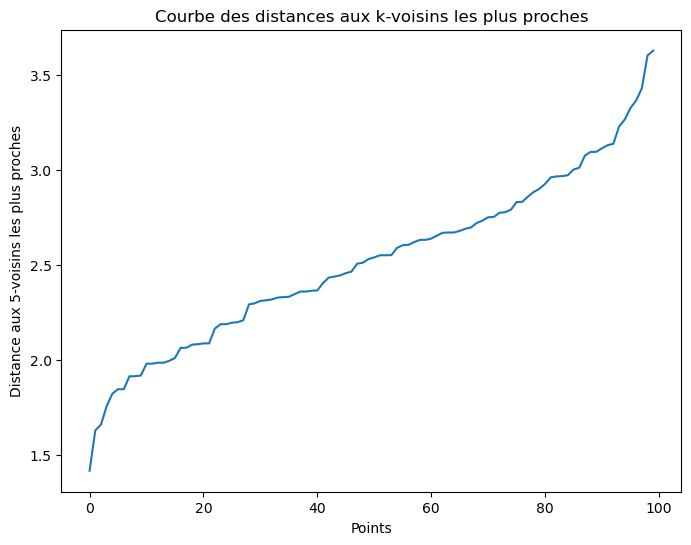

In [71]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Calculer la distance aux k-voisins les plus proches
k = 5  # Choisir le nombre de voisins (essayer différentes valeurs)
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

# Trier les distances
distances = np.sort(distances[:, k-1], axis=0)

# Tracer la courbe des distances
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title("Courbe des distances aux k-voisins les plus proches")
plt.xlabel("Points")
plt.ylabel(f"Distance aux {k}-voisins les plus proches")
plt.show()


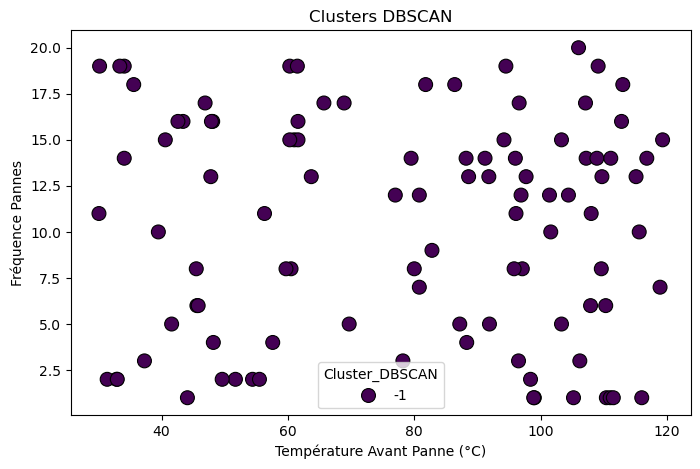

Labels trouvés : {-1}
Cluster -1 : 100 points
DBSCAN n'a pas trouvé de clusters significatifs ou tous les points sont classés comme bruit.


In [89]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Appliquer DBSCAN sur les données non normalisées (X)
dbscan = DBSCAN(eps=2.5, min_samples=5)
data['Cluster_DBSCAN'] = dbscan.fit_predict(X)  # Utilisation de X non normalisé

# Visualisation des clusters DBSCAN
# Utilisation de deux premières composantes principales pour la visualisation
plt.figure(figsize=(8,5))
sns.scatterplot(x=X['Température Avant Panne (°C)'], y=X['Fréquence Pannes'], hue=data['Cluster_DBSCAN'], palette='viridis', s=100, edgecolor='k')
plt.title('Clusters DBSCAN')
plt.show()

# Afficher la taille des clusters et des labels
unique_labels = set(dbscan.labels_)
print(f"Labels trouvés : {unique_labels}")
for label in unique_labels:
    print(f"Cluster {label} : {list(dbscan.labels_).count(label)} points")

# Score silhouette (si plus d'un cluster et au moins un cluster différent du bruit (-1))
if len(set(dbscan.labels_)) > 1 and -1 not in set(dbscan.labels_):
    silhouette_dbscan = silhouette_score(X, data['Cluster_DBSCAN'])  # Utilisation de X non normalisé
    print(f"📊 DBSCAN Silhouette Score: {silhouette_dbscan:.3f}")
else:
    silhouette_dbscan = -1
    print("DBSCAN n'a pas trouvé de clusters significatifs ou tous les points sont classés comme bruit.")


# Conclusion


## Analyse et décisions pour la direction

In [17]:
print(data.columns)

Index(['Note Globale', 'Nombre de Mots', 'Mots-Clés Positifs',
       'Mots-Clés Négatifs', 'Type de Séjour', 'Durée Séjour (nuits)',
       'Mode de Réservation', 'Nationalité', 'Fréquence Séjours',
       'Cluster_KMeans', 'Cluster_DBSCAN'],
      dtype='object')


In [90]:
# Statistiques des clusters DBSCAN
cluster_summary = data.groupby('Cluster_DBSCAN').mean()
print("📌 Analyse des segments des clusters DBSCAN :\n", cluster_summary)

# Recommandations basées sur les segments DBSCAN
for cluster_id in sorted(data['Cluster_DBSCAN'].unique()):
    if cluster_id != -1:  # Ignorer le cluster -1 (bruit)
        print(f"\n🔎 **Segment {cluster_id}** :")
        segment = data[data['Cluster_DBSCAN'] == cluster_id]
        
        # Calcul des caractéristiques moyennes du segment
        segment_mean = segment.mean(numeric_only=True)
        
        # Afficher les caractéristiques principales
        print(f" - Principales caractéristiques du cluster {cluster_id} :")
        print(segment_mean.sort_values(ascending=False).head(3))

        # Recommandations basées sur la distribution des caractéristiques
        # Exemple : recommander en fonction des pannes et de la température, par exemple
        if segment_mean['Durée Panne (h)'] > 10:
            print("🚨 Recommandation : Ce segment présente une durée de panne élevée, il serait important d'analyser les causes sous-jacentes et de prendre des mesures correctives.")
        elif segment_mean['Température Avant Panne (°C)'] > 50:
            print("🚨 Recommandation : Température élevée avant la panne, des actions pour contrôler la température des machines pourraient être nécessaires.")
        else:
            print("✅ Recommandation : Ce segment semble bien maîtrisé. Vous pouvez explorer des solutions pour maintenir cette stabilité.")
    else:
        print(f"\n⚠️ **Cluster -1 (Bruit)** :")
        print(" - Ce cluster représente les points considérés comme bruit. Il est recommandé de revoir les données ou les paramètres de clustering pour ajuster ce bruit.")


📌 Analyse des segments des clusters DBSCAN :
                 Durée Panne (h)  Coût Réparation (€)  \
Cluster_DBSCAN                                         
-1                      17.6279           11216.6602   

                Température Avant Panne (°C)  Fréquence Pannes  \
Cluster_DBSCAN                                                   
-1                                    78.322             10.38   

                Catégorie Problème  Temps Dernière Maintenance (j)  \
Cluster_DBSCAN                                                       
-1                            1.45                          183.63   

                Niveau Usure (%)  Type Machine_Générateur  \
Cluster_DBSCAN                                              
-1                        52.898                     0.17   

                Type Machine_Moteur  Type Machine_Pompe  Type Machine_Turbine  \
Cluster_DBSCAN                                                                  
-1                           